In [6]:
#necessary imports
import pyspark
import pandas as pd
from pyspark.sql import SparkSession


#spark by examples

In [7]:
df = pd.read_csv('ecommerce.csv',low_memory = False) #reading the file named ecommerce.csv by using pandas module
print(df)

            Order ID Order Date Ship Date  Aging       Ship Mode  \
0          AU-2015-1    11/9/15  11/17/15    8.0     First Class   
1          AU-2015-2    6/30/15    7/2/15    2.0     First Class   
2          AU-2015-3    12/5/15  12/13/15    8.0     First Class   
3          AU-2015-4     5/9/15   5/16/15    7.0     First Class   
4          AU-2015-5     7/9/15   7/18/15    9.0     First Class   
...              ...        ...       ...    ...             ...   
51285  FA-2015-30771    1/21/15   1/27/15    6.0  Standard Class   
51286  FA-2015-30772    6/22/15   6/24/15    2.0  Standard Class   
51287  FA-2015-30773     1/1/15    1/7/15    6.0  Standard Class   
51288  FA-2015-30774    12/7/15  12/14/15    7.0  Standard Class   
51289  FA-2015-30775    12/1/15   12/6/15    5.0  Standard Class   

         Product Category            Product     Sales Quantity Discount  ...  \
0      Auto & Accessories  Car Media Players  $140.00         2     0.05  ...   
1      Auto & Accesso

In [8]:


columnCount = 0
for j in range(0,len(df.columns)):
    columnCount+=1
    
    
print(df.shape[0])
print(df.shape[1])
print(df.shape[0],df.shape[1])   
print(len(df)) #row count of the dataset
print(columnCount) #column count of the dataset
print("There are "+str(len(df))+" rows in the dataset.")
print("There are "+str(columnCount)+" columns in the dataset.")

51290
21
51290 21
51290
21
There are 51290 rows in the dataset.
There are 21 columns in the dataset.


In [9]:
print(df.columns)

Index(['Order ID', 'Order Date', 'Ship Date', 'Aging', 'Ship Mode',
       'Product Category', 'Product', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region',
       'Months'],
      dtype='object')


In [10]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType,DoubleType, DateType

schema = StructType([
StructField("Order ID", StringType()),
StructField("Order Date", StringType()),
StructField("Ship Date", StringType()),
StructField("Aging", DoubleType()),
StructField("Ship Mode", StringType()),
StructField("Product Category", StringType()),
StructField("Product", StringType()),
StructField("Sales", StringType()),
StructField("Quantity", IntegerType()),
StructField("Discount", DoubleType()),
StructField("Profit", StringType()),
StructField("Shipping Cost", StringType()),
StructField("Order Priority", StringType()),
StructField("Customer ID", StringType()),
StructField("Customer Name", StringType()),
StructField("Segment", StringType()),
StructField("City", StringType()),
StructField("State", StringType()),
StructField("Country", StringType()),
 StructField("Region", StringType()),
  StructField("Months", StringType()),
])


spark = SparkSession.builder.appName('EcommerceDataAnalysis').getOrCreate() 
ecommerceDataFrame = spark.read.csv('ecommerce.csv', header = True, schema = schema) 

In [11]:
ecommerceDataFrame.printSchema()
ecommerceDataFrame.show()

root
 |-- Order ID: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Ship Date: string (nullable = true)
 |-- Aging: double (nullable = true)
 |-- Ship Mode: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Sales: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Discount: double (nullable = true)
 |-- Profit: string (nullable = true)
 |-- Shipping Cost: string (nullable = true)
 |-- Order Priority: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Months: string (nullable = true)

+----------+----------+---------+-----+-----------+------------------+--------------------+--------+--------+--------+--------+-------------+---

In [12]:
ecommerceDataFrame.head(4) #Brings upmost 4 row

[Row(Order ID='AU-2015-1', Order Date='11/9/15', Ship Date='11/17/15', Aging=8.0, Ship Mode='First Class', Product Category='Auto & Accessories', Product='Car Media Players', Sales='$140.00 ', Quantity=2, Discount=0.05, Profit='$46.00 ', Shipping Cost='$4.60 ', Order Priority='Medium', Customer ID='LS-001', Customer Name='Lane Daniels', Segment='Consumer', City='Brisbane', State='Queensland', Country='Australia', Region='Oceania', Months='Nov'),
 Row(Order ID='AU-2015-2', Order Date='6/30/15', Ship Date='7/2/15', Aging=2.0, Ship Mode='First Class', Product Category='Auto & Accessories', Product='Car Speakers', Sales='$211.00 ', Quantity=3, Discount=0.03, Profit='$112.00 ', Shipping Cost='$11.20 ', Order Priority='Medium', Customer ID='IZ-002', Customer Name='Alvarado Kriz', Segment='Home Office', City='Berlin', State='Berlin', Country='Germany', Region='Central', Months='Jun'),
 Row(Order ID='AU-2015-3', Order Date='12/5/15', Ship Date='12/13/15', Aging=8.0, Ship Mode='First Class', Pr

In [13]:
ecommerceDataFrame.printSchema() #displaying the schema of the data frame, and name & data type of each column in the data frame. 

root
 |-- Order ID: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Ship Date: string (nullable = true)
 |-- Aging: double (nullable = true)
 |-- Ship Mode: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Sales: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Discount: double (nullable = true)
 |-- Profit: string (nullable = true)
 |-- Shipping Cost: string (nullable = true)
 |-- Order Priority: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Months: string (nullable = true)



In [14]:
print("Data row count:    " + str(ecommerceDataFrame.count()))
print("Data column count: " + str(len(ecommerceDataFrame.columns)))
ecommerceDataFrame.printSchema() 

Data row count:    51290
Data column count: 21
root
 |-- Order ID: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Ship Date: string (nullable = true)
 |-- Aging: double (nullable = true)
 |-- Ship Mode: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Sales: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Discount: double (nullable = true)
 |-- Profit: string (nullable = true)
 |-- Shipping Cost: string (nullable = true)
 |-- Order Priority: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Months: string (nullable = true)



In [15]:
ecommerceDataFrame.groupBy("Profit").count().show()

+--------+-----+
|  Profit|count|
+--------+-----+
|$112.00 |   83|
|$129.50 |   79|
|$138.20 |  230|
| $23.00 |   87|
|$126.60 |  235|
| $18.30 |   36|
| $13.00 |   80|
|$129.80 |  298|
| $54.00 |  184|
| $15.20 |   77|
| $31.80 |   13|
| $69.30 |    9|
|  $7.80 |   29|
| $15.50 |  547|
|$136.60 |  289|
| $26.20 |   54|
| $45.00 |   69|
| $22.50 |  322|
|$130.60 |  257|
|$128.30 |  101|
+--------+-----+
only showing top 20 rows



In [16]:
ecommerceDataFrame.columns

['Order ID',
 'Order Date',
 'Ship Date',
 'Aging',
 'Ship Mode',
 'Product Category',
 'Product',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost',
 'Order Priority',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Region',
 'Months']

In [17]:
ecommerceDataFrame = ecommerceDataFrame.na.fill('FA-2015-100000',subset=['Order ID'])
ecommerceDataFrame = ecommerceDataFrame.fillna('12/25/15', subset=['Order Date'])
ecommerceDataFrame = ecommerceDataFrame.na.fill('12/29/15',subset=['Order Date'])
ecommerceDataFrame = ecommerceDataFrame.na.fill(5.0,'Aging')
ecommerceDataFrame = ecommerceDataFrame.na.fill('Standard Class','Ship Mode')
ecommerceDataFrame = ecommerceDataFrame.na.fill('Fashion','Product Category')
ecommerceDataFrame = ecommerceDataFrame.na.fill('Sports Wear','Product')
ecommerceDataFrame = ecommerceDataFrame.na.fill('$180.00','Sales')
ecommerceDataFrame = ecommerceDataFrame.na.fill(3,'Quantity')
ecommerceDataFrame = ecommerceDataFrame.na.fill('Alex Souza','Customer Name')
ecommerceDataFrame = ecommerceDataFrame.na.fill('25000','Customer ID')
ecommerceDataFrame = ecommerceDataFrame.na.fill(0.05,'Discount')
ecommerceDataFrame = ecommerceDataFrame.na.fill('$54.00','Profit')
ecommerceDataFrame = ecommerceDataFrame.na.fill('$180.00','Shipping Cost')
ecommerceDataFrame = ecommerceDataFrame.na.fill('Home Office','Segment')
ecommerceDataFrame = ecommerceDataFrame.na.fill('Africa','Region')
ecommerceDataFrame = ecommerceDataFrame.na.fill('Medium','Order Priority')



df["Order ID"].fillna("FA-2015-100000", inplace = True)
df["Order Date"].fillna("12/31/15", inplace = True)
df["Ship Date"].fillna("12/29/15", inplace = True)
df["Aging"].fillna(5.0, inplace = True)
df["Ship Mode"].fillna("Standard Class", inplace = True)
df["Product Category"].fillna("Fashion", inplace = True)
df["Product"].fillna("Sports Wear", inplace = True)
df["Sales"].fillna("$180.00", inplace = True)
df["Quantity"].fillna(3, inplace = True)
df["Customer Name"].fillna("Alex Souza", inplace = True)
df["Customer ID"].fillna("25000", inplace = True)
df["Discount"].fillna(0.05, inplace = True)
df["Profit"].fillna("$54.00", inplace = True)
df["Shipping Cost"].fillna("$180.00", inplace = True)
df["Segment"].fillna("Home Office", inplace = True)
df["Region"].fillna("Africa", inplace = True)
df["Order Priority"].fillna("Medium", inplace = True)

df["Region"].replace({"4orth": "North", "So3th": "South"}, inplace=True)
df["Ship Mode"].replace({"45788": "First Class"}, inplace=True)
df["Quantity"].replace({"Standard Class": 1, "abc": 2}, inplace=True)
df["Discount"].replace({"xxx": 0.05}, inplace=True)

In [18]:
from pyspark.sql import functions as F
ecommerceDataFrame = ecommerceDataFrame.withColumn('Region',
    F.when(ecommerceDataFrame['Region']=='4orth','North').
    otherwise(ecommerceDataFrame['Region']))

ecommerceDataFrame = ecommerceDataFrame.withColumn('Region',
    F.when(ecommerceDataFrame['Region']=='So3th','South').
    otherwise(ecommerceDataFrame['Region']))

ecommerceDataFrame.groupBy('Region').count().show() 


+--------------+-----+
|        Region|count|
+--------------+-----+
|        Africa| 4588|
|    North Asia| 2338|
|  Central Asia| 2048|
|         South| 6644|
|     Caribbean| 1690|
|       Central|11117|
|          East| 2848|
|       Oceania| 3487|
|        Canada|  384|
|          West| 3203|
|          EMEA| 5029|
|Southeast Asia| 3129|
|         North| 4785|
+--------------+-----+



In [19]:
ecommerceDataFrame.columns
ecommerceDataFrame.printSchema()

root
 |-- Order ID: string (nullable = false)
 |-- Order Date: string (nullable = false)
 |-- Ship Date: string (nullable = true)
 |-- Aging: double (nullable = false)
 |-- Ship Mode: string (nullable = false)
 |-- Product Category: string (nullable = false)
 |-- Product: string (nullable = false)
 |-- Sales: string (nullable = false)
 |-- Quantity: integer (nullable = true)
 |-- Discount: double (nullable = false)
 |-- Profit: string (nullable = false)
 |-- Shipping Cost: string (nullable = false)
 |-- Order Priority: string (nullable = false)
 |-- Customer ID: string (nullable = false)
 |-- Customer Name: string (nullable = false)
 |-- Segment: string (nullable = false)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Region: string (nullable = false)
 |-- Months: string (nullable = true)



In [20]:
ecommerceDataFrame.groupBy('Order Date').count().show() 
ecommerceDataFrame.groupBy('Ship Date').count().show() 
ecommerceDataFrame.groupBy('Aging').count().show() 

ecommerceDataFrame = ecommerceDataFrame.withColumn('Ship Mode',
    F.when(ecommerceDataFrame['Ship Mode']=='45788','First Class').
    otherwise(ecommerceDataFrame['Ship Mode']))
ecommerceDataFrame.groupBy('Ship Mode').count().show() 


ecommerceDataFrame.groupBy('Product Category').count().show() 
ecommerceDataFrame.groupBy('Product').count().show() 
ecommerceDataFrame.groupBy('Sales').count().show() 

ecommerceDataFrame = ecommerceDataFrame.withColumn('Quantity',
    F.when(ecommerceDataFrame['Quantity']=='Standard Class',1).
    otherwise(ecommerceDataFrame['Quantity']))

ecommerceDataFrame = ecommerceDataFrame.withColumn('Quantity',
    F.when(ecommerceDataFrame['Quantity']=='abc',2).
    otherwise(ecommerceDataFrame['Quantity']))

ecommerceDataFrame.groupBy('Quantity').count().show() 

ecommerceDataFrame = ecommerceDataFrame.withColumn('Discount',
    F.when(ecommerceDataFrame['Discount']=='xxx',0.05).
    otherwise(ecommerceDataFrame['Discount']))

ecommerceDataFrame.groupBy('Discount').count().show() 





ecommerceDataFrame.groupBy('Profit').count().show() 
ecommerceDataFrame.groupBy('Shipping Cost').count().show() 
ecommerceDataFrame.groupBy('Order Priority').count().show() 
ecommerceDataFrame.groupBy('Customer ID').count().show() 

+----------+-----+
|Order Date|count|
+----------+-----+
|   9/29/15|  161|
|    3/8/15|  150|
|   10/5/15|  126|
|  12/31/15|  141|
|   3/25/15|  125|
|   2/28/15|  135|
|    4/9/15|  141|
|  10/22/15|  166|
|   10/4/15|  144|
|   3/22/15|  162|
|   8/16/15|  153|
|  11/26/15|  144|
|   2/19/15|  122|
|  11/14/15|  146|
|    5/5/15|  141|
|  11/25/15|  146|
|   7/18/15|  149|
|    6/9/15|  153|
|    8/1/15|  139|
|   2/14/15|  149|
+----------+-----+
only showing top 20 rows

+---------+-----+
|Ship Date|count|
+---------+-----+
|   3/8/15|  162|
|  9/29/15|  126|
|  10/5/15|  148|
|  3/25/15|  164|
|  2/28/15|  137|
| 12/31/15|  130|
|   4/9/15|  127|
|  3/22/15|  137|
| 10/22/15|  139|
|  10/4/15|  132|
|   1/9/16|   36|
| 11/26/15|  128|
|  8/16/15|  127|
| 11/14/15|  165|
|  2/19/15|  136|
|   5/5/15|  112|
|  7/18/15|  140|
| 11/25/15|  134|
|   6/9/15|  129|
|   1/3/16|  114|
+---------+-----+
only showing top 20 rows

+-----+-----+
|Aging|count|
+-----+-----+
|  8.0| 4820|
|  7

In [21]:
ecommerceDataFrame.groupBy('Customer Name').count().show() 
ecommerceDataFrame.groupBy('Segment').count().show() 
ecommerceDataFrame.groupBy('City').count().show() 
ecommerceDataFrame.groupBy('State').count().show()
ecommerceDataFrame.groupBy('Country').count().show() 
ecommerceDataFrame.groupBy('Region').count().show() 
ecommerceDataFrame.groupBy('Months').count().show() 

+-------------------+-----+
|      Customer Name|count|
+-------------------+-----+
|    Mills Collister|   82|
|          Ray Crowe|   79|
|          Hart Daly|   55|
|Hutchinson Prescott|   69|
|    Stevens Catlett|   55|
|        Hurst Shami|   86|
|   Vincent Peterman|   66|
|     Padilla Kunitz|   68|
|     Walsh Hamilton|   68|
|   Morrison Edelman|   76|
|         Silva Folk|   54|
|      Fox D'Ascenzo|   68|
|        Ruiz Darley|   69|
|    Mercado Stivers|   67|
| Peterson Blumstein|   62|
|     Holloway Lucas|   50|
|     Farrell Sewall|   56|
|        Young Avila|   61|
|   William Ulpright|   47|
|   Scott Ballentine|   70|
+-------------------+-----+
only showing top 20 rows

+-----------+-----+
|    Segment|count|
+-----------+-----+
|   Consumer|26518|
|Home Office| 9343|
|  Corporate|15429|
+-----------+-----+

+-----------------+-----+
|             City|count|
+-----------------+-----+
|          Morelia|   71|
|        Bangalore|   50|
|  Rueil-Malmaison|    2|
|    

Problem 1 :
+--------------+------------+----+
|        Region|Quantity_Sum|rank|
+--------------+------------+----+
|       Central|       33263|   1|
|         South|       19927|   1|
|          EMEA|       14988|   1|
|         North|       14372|   1|
|        Africa|       13634|   1|
|       Oceania|       10443|   1|
|          West|        9702|   1|
|Southeast Asia|        9467|   1|
|          East|        8536|   1|
|    North Asia|        7105|   1|
|  Central Asia|        6159|   1|
|     Caribbean|        4978|   1|
|        Canada|        1161|   1|
+--------------+------------+----+

Row(Region='Central', Quantity_Sum=33263, rank=1)
+-------+------------+----+
| Region|Quantity_Sum|rank|
+-------+------------+----+
|Central|       33263|   1|
+-------+------------+----+
only showing top 1 row



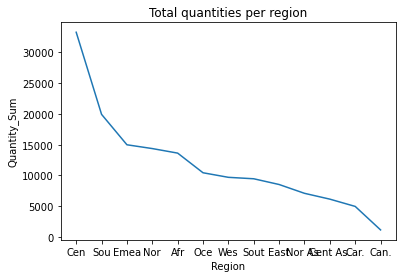

In [30]:
##########Problem1#############################################################
#Region
#Product
#Quantity, Rank

from pyspark.sql.functions import sum,col
import pyspark.sql.functions as func
from pyspark.sql.functions import first,last

print("Problem 1 :")
my_initial_list = ecommerceDataFrame.select("Region").rdd.flatMap(lambda x: x).collect()
my_second_list = ecommerceDataFrame.select("Product").rdd.flatMap(lambda x: x).collect()
my_third_list = ecommerceDataFrame.select("Quantity").rdd.flatMap(lambda x: x).collect()
l = []
for i in range(0,len(my_initial_list)):
    lis = []
    lis.append(my_initial_list[i]);
    lis.append(my_second_list[i]);
    lis.append(my_third_list[i]);
    l.append(lis)
    
import pyspark.sql.functions as func
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, col, row_number

d = spark.createDataFrame(l,["Region","Product","Quantity"])
partition  = Window.partitionBy("Region")
wind = partition.orderBy(sum("Quantity"))
a = d.groupBy(["Region"]).agg(sum("Quantity").alias("Quantity_Sum"),rank().over(wind).alias("rank")).sort(col('Quantity_Sum').desc())
a.show()
print(a.collect()[0]) #show the maximum sold products.
a.show(1)

##########Problem1#############################################################

#En çok satış hacmi hangi bölgede ? (Central)

#Bölge Adı, Satış Hacmi




import matplotlib.pyplot as plt



quantity_sum_list = a.select("Quantity_Sum").rdd.flatMap(lambda x: x).collect()
regions_list = ["Cen","Sou","Emea","Nor","Afr","Oce","Wes","Sout","East","Nor As","Cent As.","Car.","Can."]
plt.plot(regions_list, quantity_sum_list)
plt.xlabel("Region")
plt.ylabel("Quantity_Sum")
plt.title("Total quantities per region")
plt.show()





In [23]:
##################PROBLEM-2 Solution#########################################
ecommerceDataFrame.groupBy('Segment','Months').sum('Quantity').show()
############################Problem-2 Solution#########################################

#Segment bazlı aylık toplam satış miktarı

+-----------+------+-------------+
|    Segment|Months|sum(Quantity)|
+-----------+------+-------------+
|  Corporate|   Mar|         4027|
|Home Office|   Dec|         2424|
|   Consumer|   Apr|         6325|
|   Consumer|   Aug|         6788|
|  Corporate|   Jan|         3981|
|Home Office|   Jan|         2402|
|  Corporate|   Nov|         3853|
|  Corporate|   Jul|         3901|
|   Consumer|   Oct|         6789|
|Home Office|   Oct|         2420|
|  Corporate|   Sep|         3615|
|   Consumer|   Feb|         5912|
|   Consumer|   Mar|         6891|
|   Consumer|   Dec|         6772|
|  Corporate|   Aug|         3987|
|Home Office|   Mar|         2431|
|Home Office|   Jun|         2379|
|  Corporate|   Feb|         3482|
|   Consumer|   Jun|         6685|
|  Corporate|   Oct|         3878|
+-----------+------+-------------+
only showing top 20 rows



In [67]:
##########Problem3 Solution#############################################################
#Region
#Product
#Quantity, Rank

from pyspark.sql.functions import sum,col
import pyspark.sql.functions as func

print("Problem 3: ")
my_initial_list = ecommerceDataFrame.select("Region").rdd.flatMap(lambda x: x).collect()
my_second_list = ecommerceDataFrame.select("Product").rdd.flatMap(lambda x: x).collect()
my_third_list = ecommerceDataFrame.select("Quantity").rdd.flatMap(lambda x: x).collect()
l = []
for i in range(0,len(my_initial_list)):
    lis = []
    lis.append(my_initial_list[i]);
    lis.append(my_second_list[i]);
    lis.append(my_third_list[i]);
    l.append(lis)
    
import pyspark.sql.functions as func
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, col, row_number

d = spark.createDataFrame(l,["Region","Product","Quantity"])
partition  = Window.partitionBy("Region")
wind = partition.orderBy(sum("Quantity").desc())

q = d.groupBy(["Region","Product"]).agg(sum("Quantity").alias("Quantity_Sum"),row_number().over(wind).alias("rank")).filter(col("rank")<=3)
q.show()
print(q.columns)
##########Problem3 Solution#############################################################
#her bölgede satılan top3 ürün













#plt.plot(lst3,lst4)

#plt.title("Total quantities for each product")

#plt.xlabel("Products")

#plt.ylabel("Quantities")

#plt.show()

############Plotting monthly customer numbers ########################




Problem 3: 
+------------+-------------+------------+----+
|      Region|      Product|Quantity_Sum|rank|
+------------+-------------+------------+----+
|      Africa|     Sneakers|         796|   1|
|      Africa| Casula Shoes|         795|   2|
|      Africa| Formal Shoes|         793|   3|
|      Canada| Fossil Watch|          80|   1|
|      Canada|  Titak watch|          74|   2|
|      Canada|        Jeans|          58|   3|
|   Caribbean|        Suits|         302|   1|
|   Caribbean|        Jeans|         299|   2|
|   Caribbean|  Sports Wear|         291|   3|
|     Central|  Titak watch|        1929|   1|
|     Central|  Sports Wear|        1886|   2|
|     Central| Fossil Watch|        1885|   3|
|Central Asia|        Suits|         398|   1|
|Central Asia|  Titak watch|         387|   2|
|Central Asia|Running Shoes|         383|   3|
|        EMEA|        Suits|         851|   1|
|        EMEA| Formal Shoes|         850|   2|
|        EMEA|  Titak watch|         841|   3|
|

+----------+-----+
|Order Date|count|
+----------+-----+
|   9/29/15|  161|
|    3/8/15|  150|
|   10/5/15|  126|
|  12/31/15|  141|
|   3/25/15|  125|
|   2/28/15|  135|
|    4/9/15|  141|
|  10/22/15|  166|
|   10/4/15|  144|
|   3/22/15|  162|
|   8/16/15|  153|
|  11/26/15|  144|
|   2/19/15|  122|
|  11/14/15|  146|
|    5/5/15|  141|
|  11/25/15|  146|
|   7/18/15|  149|
|    6/9/15|  153|
|    8/1/15|  139|
|   2/14/15|  149|
+----------+-----+
only showing top 20 rows

+------+-----+
|Months|count|
+------+-----+
|   Oct| 4380|
|   Sep| 4197|
|   Dec| 4429|
|   Aug| 4298|
|   May| 4293|
|   Jun| 4211|
|   Feb| 3877|
|   Nov| 4207|
|   Mar| 4412|
|   Jan| 4365|
|   Apr| 4176|
|   Jul| 4445|
+------+-----+

+----------+-----------+------+
|Order Date|Customer ID|Months|
+----------+-----------+------+
|11/9/15   |LS-001     |Nov   |
|6/30/15   |IZ-002     |Jun   |
|12/5/15   |EN-003     |Dec   |
|5/9/15    |AN-004     |May   |
|7/9/15    |ON-005     |Jul   |
|2/25/15   |TO-006   

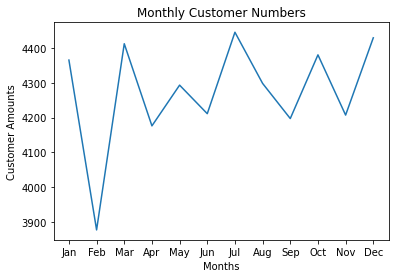

In [71]:

###########################Problem 4 Solution####################################################
#2015 yılında hangi ayda en çok yeni müşteri gelmiş.
ecommerceDataFrame.groupBy('Order Date').count().show()

#date'e çevir where'e 2015 yazcaz.
#customer idleri count et.
#groupbya ayları yaz.
#maxı dön.

from pyspark.sql.functions import split,col,desc
#ecommerceDataFrame.withColumn("Yearssss", split(col("Order Date"), "/").getItem(2)).groupBy("Yearssss").count().show()
#ecommerceDataFrame.withColumn("Yearssss", split(col("Order Date"), "/").getItem(2)).select("Yearssss").show()
ecommerceDataFrame.groupBy("Months").count().show()

#ecommerceDataFrame.withColumn("Yearssss", split(col("Order Date"), "/")
#.getItem(2)).withColumn("Monthssss",split(col("Order Date"), "/").getItem(0)).filter("Yearssss=15").groupBy(["Monthssss"]).count().sort(col("count").desc()).show(1)

from pyspark.sql.functions import *

my_fir_lst = ecommerceDataFrame.select("Order Date").rdd.flatMap(lambda x: x).collect()
my_sec_lst = ecommerceDataFrame.select("Customer ID").rdd.flatMap(lambda x: x).collect()
my_thir_lst = ecommerceDataFrame.select("Months").rdd.flatMap(lambda x: x).collect()

l = []
for i in range(0,len(my_fir_lst)):
    lis = []
    lis.append(my_fir_lst[i])
    lis.append(my_sec_lst[i])
    lis.append(my_thir_lst[i])
    l.append(lis)
    

    
import pyspark.sql.functions as func
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, col, row_number, date_trunc,sum,unix_timestamp


    
dff = spark.createDataFrame(l,["Order Date","Customer ID","Months"])
from pyspark.sql import functions as F
from pyspark.sql.functions import monotonically_increasing_id


windowSpec = Window.partitionBy(monotonically_increasing_id()>=0).orderBy(monotonically_increasing_id())
#windowSpec = Window.partitionBy(col("Customer ID")).orderBy("Order Date")

dff.show(truncate = False)
dff = dff.groupBy(["Months"]).agg(count(col("Customer ID")).alias("Monthly_Customer_Number"))
dff = dff.sort(unix_timestamp(col("Months"),"MMM"))
dff = dff.withColumn("Previous_Customer_Number", F.lag(dff["Monthly_Customer_Number"],1).over(windowSpec))
dff = dff.withColumn("Customer_Difference", F.when(F.isnull(dff["Monthly_Customer_Number"] - dff.Previous_Customer_Number), 0)
                              .otherwise(dff["Monthly_Customer_Number"] - dff.Previous_Customer_Number))

dff.sort(col("Customer_Difference").desc()).show(1)
##############################Problem 4 Solution#############################################


############Plotting monthly customer numbers ########################

import matplotlib.pyplot as plt

lst1 = dff.select("Months").rdd.flatMap(lambda x: x).collect()


lst2 = dff.select("Monthly_Customer_Number").rdd.flatMap(lambda x: x).collect()

plt.plot(lst1,lst2)

plt.title("Monthly Customer Numbers")

plt.xlabel("Months")

plt.ylabel("Customer Amounts")

plt.show()

############Plotting monthly customer numbers ########################





    




+--------------+-----+
|     Ship Mode|count|
+--------------+-----+
|   First Class| 7505|
|      Same Day| 2701|
|  Second Class|10309|
|Standard Class|30775|
+--------------+-----+



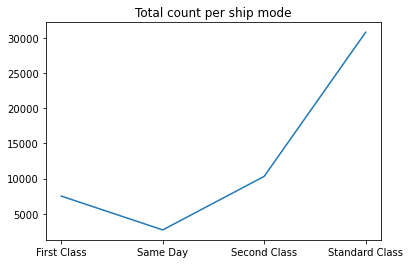

In [76]:
from pyspark.sql.functions import col, unix_timestamp, to_date, lag
from pyspark.sql.functions import *

#2015 yılında hangi ayda en çok yeni müşteri gelmiş.

spark.sql("set spark.sql.legacy.timeParserPolicy = LEGACY")   



#d = d.withColumn("Yearssss", split(col("Order Date"), "/").getItem(2)).#
#.withColumn("Yearssss", split(col("Order Date"), "/").getItem(2)).#


#Kargolama bütçesinde açık olduğunu fark ettik, planlanan bütçeden daha fazlası harcanmış. Bunun nedenini bulabilir
#misiniz?


my_Data_Set = ecommerceDataFrame.groupBy('Ship Mode').count()
my_Data_Set.show() #%20'si first class + same day, bütçe tasarrufu için first class ve same day ship sayıları azaltılabilir.




##########Plotting ship mode counts per ship mode##########################
import matplotlib.pyplot as plt
my_fourth_list = ecommerceDataFrame.select("Ship Mode").rdd.flatMap(lambda x: x).collect()
b = []
for j in range(0,len(my_fourth_list)):
    a = []
    a.append(my_fourth_list[j])
    b.append(a)
    
dfff = spark.createDataFrame(b,["Ship Mode"])

dfff = dfff.groupBy(col("Ship Mode")).agg(count(col("Ship Mode")).alias("Ship_Mode_Count"))

firstLst = dfff.select("Ship Mode").rdd.flatMap(lambda x: x).collect()
secondLst = dfff.select("Ship_Mode_Count").rdd.flatMap(lambda x: x).collect()

plt.plot(firstLst,secondLst)
plt.title("Total count per ship mode")
plt.show()

#bar , pie charta çevir. 



In [27]:


#######Problem-5 Solution#############################################################################
###Description: For each country, find the state names where the total sold product amount is the least for that state.
#Region
#Product
#Quantity, Rank

from pyspark.sql.functions import sum,col
import pyspark.sql.functions as func

my_initial_list = ecommerceDataFrame.select("Country").rdd.flatMap(lambda x: x).collect()
my_second_list = ecommerceDataFrame.select("State").rdd.flatMap(lambda x: x).collect()
my_third_list = ecommerceDataFrame.select("Product").rdd.flatMap(lambda x: x).collect()
my_fourth_list = ecommerceDataFrame.select("Quantity").rdd.flatMap(lambda x: x).collect()
l = []
for i in range(0,len(my_initial_list)):
    lis = []
    lis.append(my_initial_list[i]);
    lis.append(my_second_list[i]);
    lis.append(my_third_list[i]);
    lis.append(my_fourth_list[i]);
    l.append(lis)
    
import pyspark.sql.functions as func
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, col, row_number



d = spark.createDataFrame(l,["Country","State","Product","Quantity"])
partition  = Window.partitionBy("Country")
wind = partition.orderBy(sum("Quantity").asc())
d.groupBy(["Country","State"]).agg(rank().over(wind).alias("rank")).filter(col("rank")==1).drop(col("rank")).show()

#######Problem-5 Solution###############################################################################

+--------------------+--------------------+
|             Country|               State|
+--------------------+--------------------+
|         Afghanistan|            Kandahar|
|             Albania|             Elbasan|
|             Algeria|               Medea|
|              Angola|               Huila|
|           Argentina|            La Rioja|
|             Armenia|                Lori|
|           Australia|  Northern Territory|
|             Austria|            Salzburg|
|          Azerbaijan|                Baki|
|             Bahrain|            Muharraq|
|          Bangladesh|              Sylhet|
|            Barbados|       Saint Michael|
|             Belarus|           Vitsyebsk|
|             Belgium|               Liège|
|               Benin|              Borgou|
|               Benin|                Mono|
|             Bolivia|          Cochabamba|
|Bosnia and Herzeg...|Federation of Bos...|
|              Brazil|                Acre|
|            Bulgaria|          

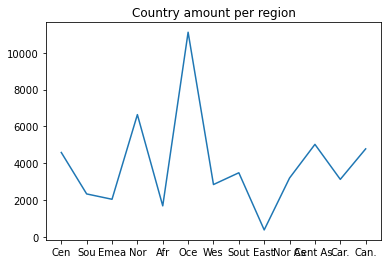

In [87]:
#Plotting Country Count per Region
import matplotlib.pyplot as plt

h = []
fLis = ecommerceDataFrame.select("Region").rdd.flatMap(lambda x: x).collect()
sLis = ecommerceDataFrame.select("Country").rdd.flatMap(lambda x: x).collect()
for x in range(0,len(fLis)):
    i = []
    i.append(fLis[x])
    i.append(sLis[x])
    h.append(i)
    
my_dt = spark.createDataFrame(h,["Region","Country"])

my_dt = my_dt.groupBy([col("Region")]).agg(count(col("Country")).alias("Country_Amount_Per_Region"))

firstLst = ["Cen","Sou","Emea","Nor","Afr","Oce","Wes","Sout","East","Nor As","Cent As.","Car.","Can."]
secondLst = my_dt.select("Country_Amount_Per_Region").rdd.flatMap(lambda x: x).collect()
print(secondLst)
plt.plot(firstLst,secondLst)
plt.title("Country amount per region")

plt.show()


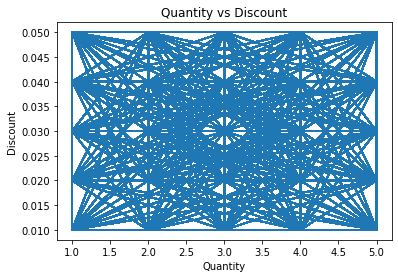

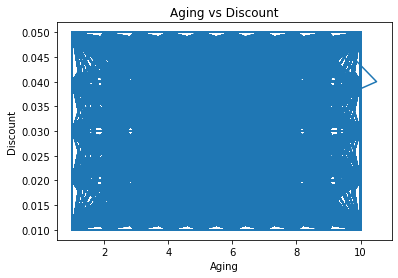

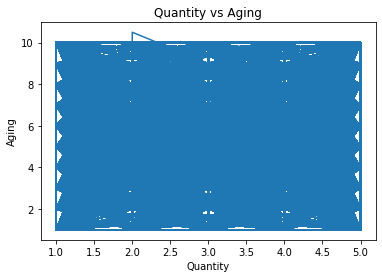

In [28]:
import matplotlib.pyplot as plt

my_lst = ecommerceDataFrame.select("Quantity").rdd.flatMap(lambda x: x).collect()
my_second_lst = ecommerceDataFrame.select("Discount").rdd.flatMap(lambda x: x).collect()
plt.plot(my_lst,my_second_lst)
plt.xlabel('Quantity')
plt.ylabel('Discount')
plt.title("Quantity vs Discount")
plt.show()


my_ls = ecommerceDataFrame.select("Aging").rdd.flatMap(lambda x: x).collect()
my_second_ls = ecommerceDataFrame.select("Discount").rdd.flatMap(lambda x: x).collect()
plt.plot(my_ls,my_second_ls)
plt.xlabel('Aging')
plt.ylabel('Discount')
plt.title("Aging vs Discount")
plt.show()

myList = ecommerceDataFrame.select("Quantity").rdd.flatMap(lambda x: x).collect()
mySecondList= ecommerceDataFrame.select("Aging").rdd.flatMap(lambda x: x).collect()
plt.plot(myList,mySecondList)
plt.xlabel('Quantity')
plt.ylabel('Aging')
plt.title("Quantity vs Aging")
plt.show()
